In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load  data 
df = pd.read_csv("Normal_Data.txt",)

<AxesSubplot:xlabel='x', ylabel='y'>

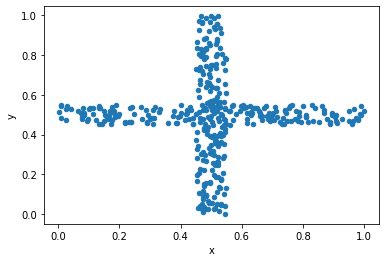

In [10]:
# extract data from file
iterator = 1
x = []
y = []
with open("Normal_Data.txt",'r') as normal:
    for line in normal.readlines():
        if iterator ==1:
          x = line.split(',')
        else:
          y = line.split(',')
        iterator +=1
df = pd.DataFrame({"x":x,"y":y})
df = df.astype({"x":float,"y":float})
df.plot.scatter(x="x",y="y")

In [ ]:
detectors = []
detector_points = []
circle_radius = 0.04
x = np.random.random( 30,)
y = np.random.random( 30,)
for x,y in zip(x,y):
  circle = plt.Circle(( x , y ), circle_radius ,color='r',fill=False)
  detectors.append(circle)
  detector_points.append((x,y))

In [143]:
dist_map = dict()
d_dist = []
for i,d in enumerate(detector_points):
  for x,y in zip(df["x"],df["y"]):
    dist = np.linalg.norm(np.array(d)-np.array((float(x),float(y))))
    if dist <= 0.5:
      break 
    d_dist.append(dist)
  dist_map.update({i:d_dist})
  d_dist=[]


Remove all detectors that touch the normal data samples.
Discard all other detectors when the required number(10) is obtained.

In [144]:
new_detectors = []
for k,v in dist_map.items():
  if len(v) > 0 and len(new_detectors)<10:
    new_detectors.append(detectors[k])
len(new_detectors)

10

Display a plot of the normal data samples with the added detectors.

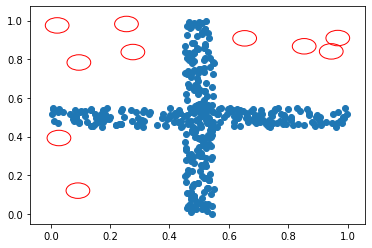

In [145]:
plt.scatter(df["x"],df["y"],)
ax = plt.gca()
# plot each new detector on existing plot 
for detector in new_detectors:
  ax.add_patch(detector)
plt.show()